In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
def load_dataset():
    train_dataset = h5py.File('/kaggle/input/catvnoncat/catvnoncat/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/kaggle/input/catvnoncat/catvnoncat/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

## Understanding the Dataset

In [4]:
print(classes)

[b'non-cat' b'cat']


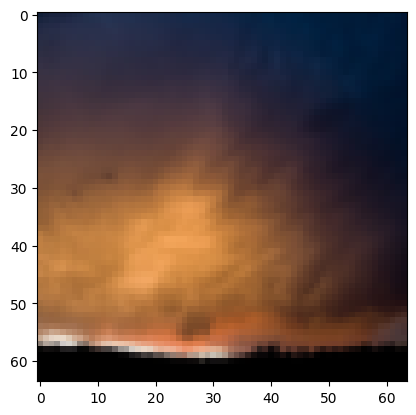

In [5]:
plt.imshow(train_set_x_orig[0])
plt.show()

In [6]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]

print("Number of training samples:",train_set_x_orig.shape[0])
print("Number of test samples:",test_set_x_orig.shape[0])
print("Dimensions of each image, (height, width, no. of channels):", train_set_x_orig.shape[1:])
print("Dimensions of train set labels:", train_set_y.shape )
print("Dimensions of test set labels:", test_set_y.shape )

Number of training samples: 209
Number of test samples: 50
Dimensions of each image, (height, width, no. of channels): (64, 64, 3)
Dimensions of train set labels: (1, 209)
Dimensions of test set labels: (1, 50)


## Flattening the feature datasets into a feature vector

In [7]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [8]:
print("Dimensions of train set features after flattening:", train_set_x_flatten.shape )
print("Dimensions of test set features after flattening:", test_set_x_flatten.shape )

Dimensions of train set features after flattening: (12288, 209)
Dimensions of test set features after flattening: (12288, 50)


In [9]:
nx = train_set_x_flatten.shape[0]
print("No. of features in each image:", nx)

No. of features in each image: 12288


## Standardize the Data

In [10]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

## Initializing the Model Parameters

In [11]:
def initialize_params(no_of_features):
    
    """
    Initialize parameters for logistic regression.

    This function sets the weights to zero and the bias to zero for a logistic regression model.

    Arguments:
    no_of_features -- Number of input features.

    Returns:
    w -- Weight vector of shape (no_of_features, 1), initialized to zeros.
    b -- Bias term, initialized to zero.
    """

    # Weights
    # w = np.zeros((no_of_features,1))
    w = np.random.randn(no_of_features, 1)*0.01

    # Bias
    # b = 0
    b = np.random.randn()*0.01
    
    return w, b

w, b = initialize_params(nx)

print("Initialized weight matrix:\n",w)
print("Initialized bias:\n",b)
        

Initialized weight matrix:
 [[ 0.00137494]
 [ 0.00409406]
 [-0.01276333]
 ...
 [-0.01120017]
 [ 0.00769249]
 [ 0.00017258]]
Initialized bias:
 -0.011129801788146097


## Building the Model

In [12]:
def sigmoid(z):
    """
    Compute the sigmoid of z element-wise.
    
    Arguments:
    z -- A NumPy array of shape (1, m)
    
    Returns:
    A NumPy array of the same shape as z, where the sigmoid function has been applied to each element.
    """
    return 1/(1+ np.exp(-z))

In [13]:
def propagate(w, b, X, Y):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    dZ = A - Y
    m = X.shape[1]
    dw = (np.dot(X,dZ.T))/m
    db = (np.sum(dZ))/m
    
    gradients = {"dw": dw,
                 "db": db}
    return A, gradients
    
    
    

In [14]:
predictions, gradients = propagate(w, b, train_set_x, train_set_y)
print(gradients)

{'dw': array([[0.02936487],
       [0.04539702],
       [0.03174385],
       ...,
       [0.02856287],
       [0.04063866],
       [0.01313604]]), 'db': 0.11007464299291113}


In [15]:
def calculate_cost(predictions, Y):
    m = Y.shape[1]
    epsilon = 1e-10
    predictions = np.clip(predictions, epsilon, 1-epsilon)
    cost = -np.sum((np.log(predictions))*Y + (1 - Y)*(np.log(1 - predictions)))/m
    return cost

In [16]:
cost = calculate_cost(predictions, train_set_y)
print(cost)

0.6803715012162643


In [17]:
def optimize(w, b, gradients, learning_rate):
    dw = gradients["dw"]
    db = gradients["db"]
    w = w - (learning_rate)*dw
    b = b - (learning_rate)*db
    
    params = {"w": w,
             "b": b}
    return params

In [18]:
params = optimize(w, b, gradients, 0.01)
print(params)

{'w': array([[ 1.08128879e-03],
       [ 3.64009038e-03],
       [-1.30807664e-02],
       ...,
       [-1.14858032e-02],
       [ 7.28610309e-03],
       [ 4.12159367e-05]]), 'b': -0.012230548218075208}


In [19]:
def train(no_of_features, w, b, X, Y, learning_rate, no_of_iterations):
    
    w, b = initialize_params(no_of_features)
    costs = []
    
    for i in range(no_of_iterations):
        predictions, gradients = propagate(w, b, train_set_x, train_set_y)
        costs.append(calculate_cost(predictions, Y))
        params = optimize(w, b, gradients, learning_rate)
        w = params["w"]
        b = params["b"]
    
    return params, gradients, costs
    
    

In [20]:
# params, gradients, costs = train(nx, w, b, train_set_x, train_set_y, 0.01, 10000)
# print(params)
# print(costs[-1])

In [21]:
def predict(w, b, X):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    predictions = (A>0.5).astype(int)
    return predictions
    

In [22]:
predictions = predict(params["w"], params["b"], test_set_x)
print(predictions)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [23]:
def calculate_accuracy(predictions, Y):
    correct_predictions = np.sum(predictions == Y)
    total_predictions = Y.shape[1]
    accuracy = (correct_predictions/total_predictions)*100
    return accuracy 
    

In [24]:
print(calculate_accuracy(predictions, test_set_y))

34.0


In [25]:
def logistic_regression(train_set_x, train_set_y, test_set_x, test_set_y, learning_rate, no_of_iterations):
    
    nx = train_set_x.shape[0]
    
    # Initialize the parameters
    w, b = initialize_params(nx)
    
    # Training of the model
    params, gradients, costs = train(nx, w, b, train_set_x, train_set_y, 0.01, 10000)
    
    # Evaluation of the model
    predictions = predict(params["w"], params["b"], test_set_x)
    accuracy = calculate_accuracy(predictions, test_set_y)
    
    return params, predictions, costs, accuracy

In [26]:
params, predictions, costs, accuracy = logistic_regression(train_set_x, train_set_y, test_set_x, test_set_y,0.01, 10000)

In [27]:
print(accuracy, "%")

72.0 %
